In [1]:
#We import the necessary libraries.
%matplotlib inline

In [2]:
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from importlib import reload

In [4]:
import corner

In [5]:
import radvel

In [6]:
from matplotlib import rcParams

#We change the formatting of the plots.
    #rcParams["axes.formatter.useoffset"] = False => Disabling the automatic offset for tick labels, since its False
#full numbers will be displayed.
    #rcParams['axes.formatter.limits'] = -15,15 => If the tick labels are outside of range (-15, 15) Matplotlib will
#use Scientific Notation.
    #rcParams['mathtext.fontset'] = 'stix' => "STIX" font will be used for mathematical symbols, this font is used 
#in publications.
    #rcParams['font.family'] = 'STIXGeneral' => "STIXGeneral" is a part of the font family, ensures the text and
#labels also use this font.
    #rcParams['xtick.direction']='in' => This changes the direction of the x-axis tick marks to point inward,
#towards the plot area.
    #rcParams['ytick.direction']='in' => This changes the direction of the y-axis tick marks to point inward,
#towards the plot area.
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'

#import sys
#sys.path.pop(0)

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [7]:
#We add the parameters of our planet.
radius, upper_rad_err, lower_rad_err = 1.5353, 0.0333, 0.0324 #Earth Radius
mass, upper_mass_err, lower_mass_err = 6.2059, 1.1861, 1.1700  #Earth Mass
period, upper_per_err, lower_per_err = 0.2241957793, 0.0000000542, 0.0000000553  #Days

In [8]:
#Now we check all of the discovered exoplanets (so far) and our planet's location on it.
#This is called the Exoplanet Population plot.
#First, we get the list of the planets.
planetpop_file = '../../data/toi2431_extra/exoplanetpopulation_20250608.csv'
planetpop_df = pd.read_csv(planetpop_file, comment = "#")

#We then get the Names, Masses and the Radii as follows.
planetpop_names = planetpop_df["pl_name"]

#Orbital Period => [days]
planetpop_periods = planetpop_df["pl_orbper"]

#Radii => [Earth Radius]
planetpop_radii = planetpop_df["pl_rade"]

#Mass => [Earth Mass]
planetpop_mass = planetpop_df["pl_bmasse"]

# #We also need to get the Period of TOI-2431b by using the MCMC results.
# #For that, we first get the Posterior of the Period.
# period_value = df_medvals.loc[df_medvals['Labels'] == 'P_p1', 'values'].values[0]

# #We then extract the numbers and remove the $ and {} characters
# cleaned_str = period_value.replace('$', '').replace('{', '').replace('}', '').replace('_', '').replace('mp = ', '')

# #Now we have to split the string by the symbols into central, lower, and upper values
# central_value_per, lower_error_per, upper_error_per = cleaned_str.split('-')[0], cleaned_str.split('-')[1].split('+')[0], cleaned_str.split('+')[1]
# lower_error_per = lower_error_per.replace('^', '')
# upper_error_per = upper_error_per.replace('^', '')

# #We turn the strings into floats.
# central_value_per = float(central_value_per)
# lower_error_per = float(lower_error_per)
# upper_error_per = float(upper_error_per)

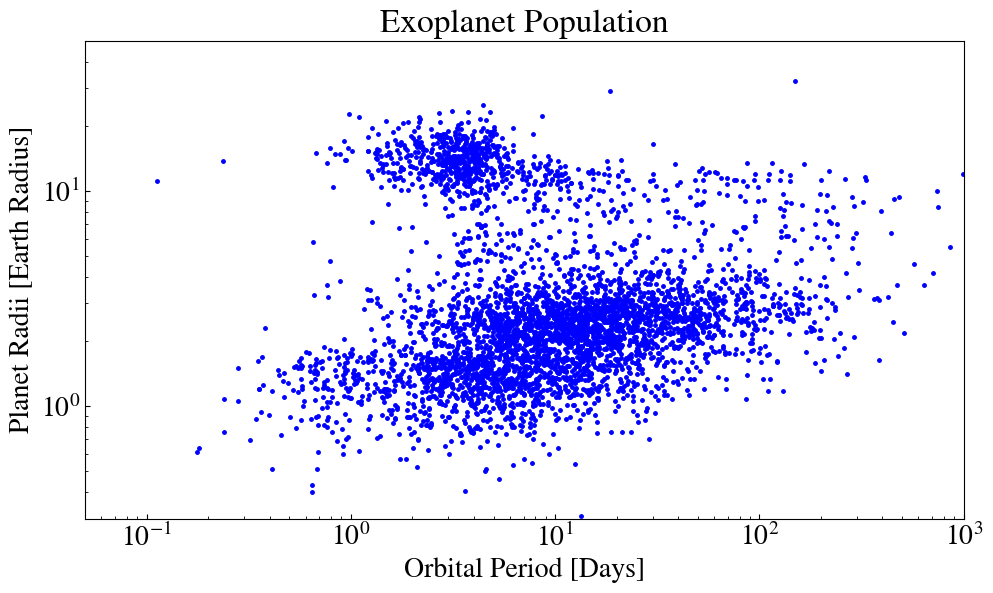

In [9]:
#Now we can plot the Exoplanet Population with our planet TOI-2431b. (Normal figsize = (10, 6))
fig = plt.figure(figsize = (10, 6))

#First we plot the Confirmed Exoplanets.
plt.plot(planetpop_periods, planetpop_radii, ".", color = "blue", label = "Confirmed Exoplanets")

#Then, we plot our planet TOI-2431b.
# plt.errorbar(period, radius, xerr = [[lower_per_err], [upper_per_err]], 
#              yerr = [[lower_rad_err], [upper_rad_err]], fmt = "o", color = "red", 
#              ecolor = "orange", capsize = 3, label = "TOI-2431b")
# plt.text(period-0.13, radius-0.12, "TOI-2431b", color = "red", weight = "bold", fontsize = 9)

plt.xlabel("Orbital Period [Days]", fontsize = 20)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 20)
plt.title("Exoplanet Population", fontsize = 24)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis = "x", which = "major", labelsize = 16)
plt.tick_params(axis = "y", which = "major", labelsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#Note: We are putting limit to the periods to see the Hot Neptune Desert clearer.
plt.xlim(0.05, 1000)
plt.ylim(0.3, 50)
#plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.savefig("exoplanet_population.png", dpi = 500)
plt.show()

In [10]:
print(f"Discoveries with Radial Velocity: {(planetpop_df['discoverymethod'] == 'Radial Velocity').sum()}")
print(f"Discoveries with Transit: {(planetpop_df['discoverymethod'] == 'Transit').sum()}")

Discoveries with Radial Velocity: 1126
Discoveries with Transit: 4383


In [11]:
#Create a mask for USP planets.
usp_mask = planetpop_df["pl_orbper"] < 1

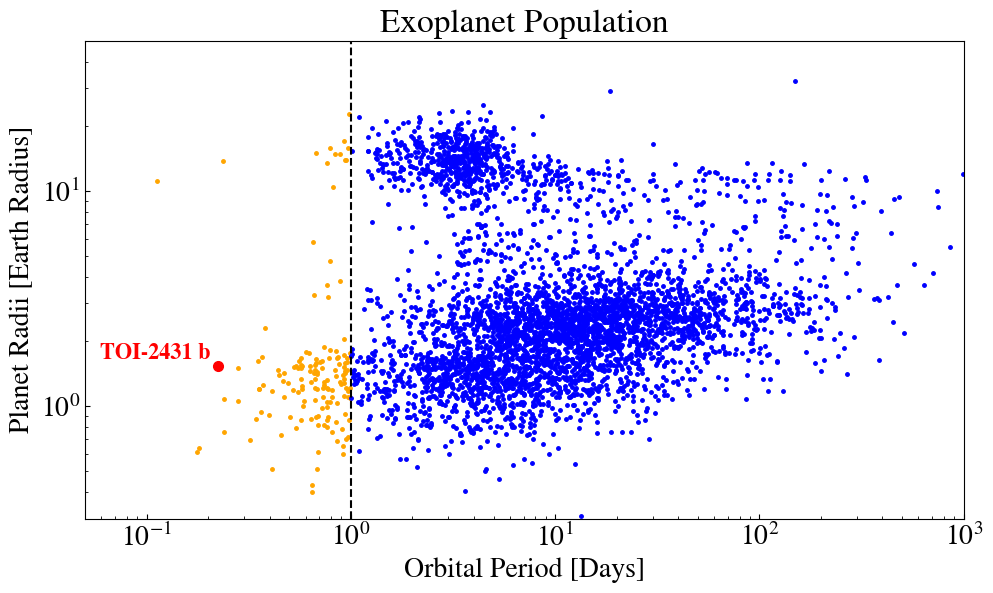

In [19]:
#Now we can plot the Exoplanet Population with our planet TOI-2431b. (Normal figsize = (10, 6))
fig = plt.figure(figsize = (10, 6))

#First we plot the Confirmed Exoplanets.
plt.plot(planetpop_periods[usp_mask], planetpop_radii[usp_mask], ".", color = "orange", label = "Confirmed USP Planets")
plt.plot(planetpop_periods[~usp_mask], planetpop_radii[~usp_mask], ".", color = "blue", label = "Confirmed Exoplanets")

#Then, we plot our planet TOI-2431b.
plt.errorbar(period, radius, xerr = [[lower_per_err], [upper_per_err]], 
             yerr = [[lower_rad_err], [upper_rad_err]], fmt = "o", color = "red", 
             ecolor = "orange", capsize = 3, ms = 7, label = "TOI-2431 b")
plt.text(period-0.165, radius+0.12, "TOI-2431 b", color = "red", weight = "bold", fontsize = 16)

plt.xlabel("Orbital Period [Days]", fontsize = 20)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 20)
plt.title("Exoplanet Population", fontsize = 24)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis = "x", which = "major", labelsize = 16)
plt.tick_params(axis = "y", which = "major", labelsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.axvline(x = 1, color = "black", linestyle = "--", linewidth = 1.5)
#Note: We are putting limit to the periods to see the Hot Neptune Desert clearer.
plt.xlim(0.05, 1000)
plt.ylim(0.3, 50)
#plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.savefig("exoplanet_population_usp.png", dpi = 500)
plt.show()